In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.matlib import repmat

In [2]:
def gen_sin_data(n_samples=100):
    x = np.linspace(0, 2*np.pi, n_samples).reshape(n_samples, 1)
    y = np.sin(x) + np.random.randn(x.shape[0], 1)*0.1
    return x, y
x, y = gen_sin_data()
print x.shape, y.shape

(100, 1) (100, 1)


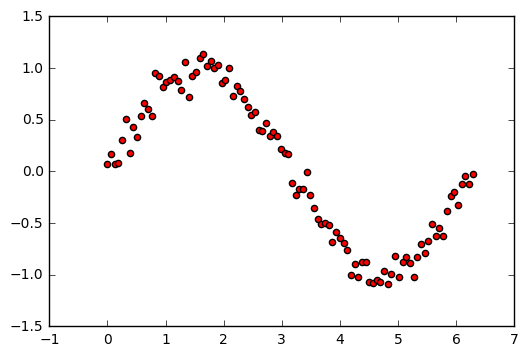

In [3]:
plt.scatter(x[:, 0], y[:, 0], c='r')
plt.savefig('./test.jpg')
plt.show()

In [73]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, RMSprop
from keras.callbacks import Callback

In [74]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.records = []
    
    def on_epoch_end(self, epoch, logs={}):
        record_metrics = (logs.get('loss'), logs.get('acc'), logs.get('val_loss'), logs.get('val_acc'))
        self.records.append(record_metrics)

In [75]:
def fit_sin(X_train, y_train, nb_epoch, callbacks):
    model = Sequential()
    model.add(Dense(output_dim=3, input_dim=1, activation='tanh'))
    model.add(Dense(output_dim=1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='sgd')
    model.fit(X_train, y_train, nb_epoch=nb_epoch, callbacks=callbacks)
    return model

In [76]:
X_train = repmat(x, 1000, 1)
y_train = repmat(y, 1000, 1)
history = LossHistory()
model_sin = fit_sin(X_train, y_train, 10, [history])
loss = [x[0] for x in history.records]

Epoch 1/10
100000/100000 [==============================] - 0s - loss: 0.0938     
Epoch 2/10
100000/100000 [==============================] - 0s - loss: 0.0526     
Epoch 3/10
100000/100000 [==============================] - 0s - loss: 0.0488     
Epoch 4/10
100000/100000 [==============================] - 0s - loss: 0.0471     
Epoch 5/10
100000/100000 [==============================] - 0s - loss: 0.0456     
Epoch 6/10
100000/100000 [==============================] - 0s - loss: 0.0306     
Epoch 7/10
100000/100000 [==============================] - 0s - loss: 0.0173     
Epoch 8/10
100000/100000 [==============================] - 0s - loss: 0.0142     
Epoch 9/10
100000/100000 [==============================] - 0s - loss: 0.0124     
Epoch 10/10
100000/100000 [==============================] - 0s - loss: 0.0113     


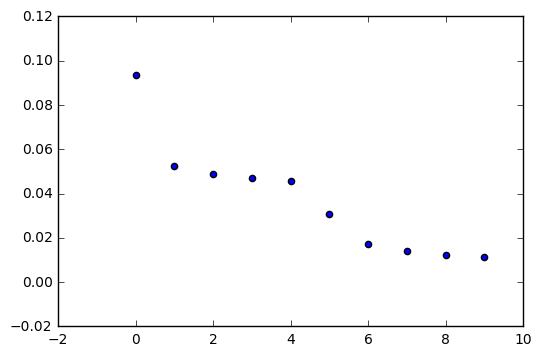

In [77]:
plt.scatter(range(len(loss)), loss)
plt.show()

In [78]:
x_test = np.linspace(0, 2*np.pi, 150).reshape(150, 1)
y_true = np.sin(x_test)
y_pred = model_sin.predict(x_test)
print y_pred.shape

(150, 1)


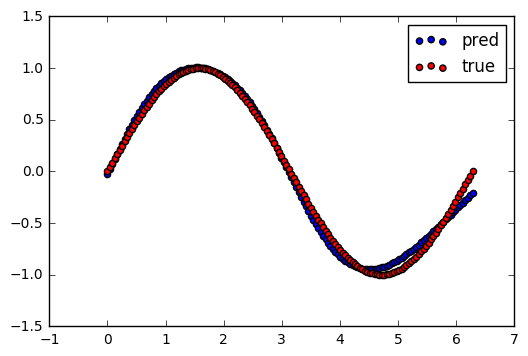

In [79]:
plt.scatter(x_test[:, 0], y_pred[:, 0], label='pred')
plt.scatter(x_test[:, 0], y_true[:, 0], c='r', label='true')
plt.legend()
plt.show()

### classification

In [80]:
n_samples = 200
x1 = np.random.randn(n_samples, 2) * 0.5 + np.asarray([[0, 1]])
x2 = np.random.randn(n_samples, 2) * 0.5 + np.asarray([[1, 0]])
y1 = np.asarray([[1, 0] for ii in range(len(x1))])
y2 = np.asarray([[0, 1] for ii in range(len(x2))])
X_train = np.concatenate([x1, x2], axis=0)
y_train = np.concatenate([y1, y2], axis=0)
print X_train.shape, y_train.shape

(400, 2) (400, 2)


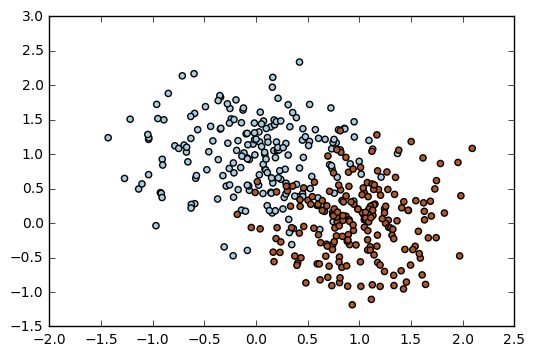

In [11]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=np.argmax(y_train, axis=1), cmap=plt.cm.Paired)
plt.savefig('./classify.jpg')
plt.show()

In [12]:
def fit_bin_classify(X_train, y_train, nb_epoch):
    model = Sequential()
    model.add(Dense(output_dim=3, input_dim=2, activation='tanh'))
    model.add(Dense(output_dim=2, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    model.fit(X_train, y_train, nb_epoch=nb_epoch)
    return model

In [13]:
X_train = repmat(X_train, 100, 1)
y_train = repmat(y_train, 100, 1)
model_bin_classify = fit_bin_classify(X_train, y_train, 10)

Epoch 1/10
40000/40000 [==============================] - 0s - loss: 0.4337 - acc: 0.8044     
Epoch 2/10
40000/40000 [==============================] - 0s - loss: 0.2301 - acc: 0.9047     
Epoch 3/10
40000/40000 [==============================] - 0s - loss: 0.2267 - acc: 0.9037     
Epoch 4/10
40000/40000 [==============================] - 0s - loss: 0.2251 - acc: 0.9041     
Epoch 5/10
40000/40000 [==============================] - 0s - loss: 0.2240 - acc: 0.9031     
Epoch 6/10
40000/40000 [==============================] - 0s - loss: 0.2229 - acc: 0.9039     
Epoch 7/10
40000/40000 [==============================] - 0s - loss: 0.2221 - acc: 0.9034     
Epoch 8/10
40000/40000 [==============================] - 0s - loss: 0.2215 - acc: 0.9036     
Epoch 9/10
40000/40000 [==============================] - 0s - loss: 0.2209 - acc: 0.9033     
Epoch 10/10
40000/40000 [==============================] - 0s - loss: 0.2204 - acc: 0.9035     


In [14]:
n_samples = 1000
x1 = np.random.randn(n_samples, 2) * 0.5 + np.asarray([[0, 1]])
x2 = np.random.randn(n_samples, 2) * 0.5 + np.asarray([[1, 0]])
y1 = np.asarray([[1, 0] for ii in range(len(x1))])
y2 = np.asarray([[0, 1] for ii in range(len(x2))])
X_test = np.concatenate([x1, x2], axis=0)
y_test = np.concatenate([y1, y2], axis=0)
model_bin_classify.evaluate(X_test, y_test)

  32/2000 [..............................] - ETA: 0s

[0.1744628672003746, 0.9355]

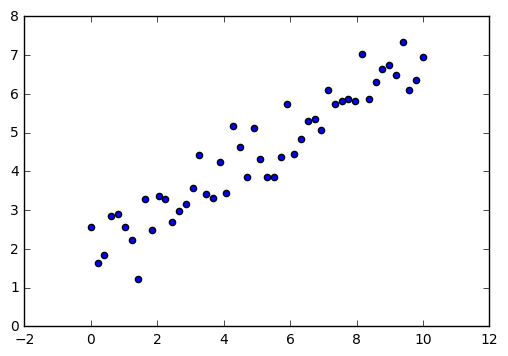

In [15]:
a = 0.5; b = 2
n_samples = 50
x = np.linspace(0, 10, n_samples)
y = a * x + b + np.random.randn(n_samples) * 0.5
plt.scatter(x, y)
plt.savefig('./mse.jpg')
plt.show()

In [39]:
import numpy as np
from sklearn import svm

def test_2():
    n_samples = 200
    ## 蓝色点集 
    x1 = np.random.randn(n_samples, 2) * 0.5 + np.asarray([[0, 1]]) 
    y1 = np.asarray([[1, 0] for ii in range(len(x1))])  

    ##　红色点集 
    x2 = np.random.randn(n_samples, 2) * 0.5 + np.asarray([[1, 0]]) 
    y2 = np.asarray([[0, 1] for ii in range(len(x2))])

    x_list=list(x1)
    y_list=list(y1)
    for x in x2:
        x_list.append(x)

    for y in y2:
        y_list.append(y)
    y_l = np.argmax(y_list)

    model=svm.SVC()
    model.fit(x_list,y_l)
    return model
                    
test_2()

ValueError: bad input shape ()